In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [376]:
dataset = pd.read_csv('dataset/appdata10.csv')

## EDA

In [377]:
print(dataset.head())

     user               first_open  dayofweek       hour  age  \
0  235136  2012-12-27 02:14:51.273          3   02:00:00   23   
1  333588  2012-12-02 01:16:00.905          6   01:00:00   24   
2  254414  2013-03-19 19:19:09.157          1   19:00:00   23   
3  234192  2013-07-05 16:08:46.354          4   16:00:00   28   
4   51549  2013-02-26 18:50:48.661          1   18:00:00   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled            enrolled_date  liked  
0                     0         0                      NaN      0  
1   

In [378]:
print(dataset.describe())

                user     dayofweek          age    numscreens      minigame  \
count   50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean   186889.729900      3.029860     31.72436     21.095900      0.107820   
std    107768.520361      2.031997     10.80331     15.728812      0.310156   
min        13.000000      0.000000     16.00000      1.000000      0.000000   
25%     93526.750000      1.000000     24.00000     10.000000      0.000000   
50%    187193.500000      3.000000     29.00000     18.000000      0.000000   
75%    279984.250000      5.000000     37.00000     28.000000      0.000000   
max    373662.000000      6.000000    101.00000    325.000000      1.000000   

       used_premium_feature      enrolled         liked  
count          50000.000000  50000.000000  50000.000000  
mean               0.172020      0.621480      0.165000  
std                0.377402      0.485023      0.371184  
min                0.000000      0.000000      0.000000 

In [379]:
print(dataset.columns)

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')


In [380]:
dataset.hour.head()

0     02:00:00
1     01:00:00
2     19:00:00
3     16:00:00
4     18:00:00
Name: hour, dtype: object

## Data Cleaning

In [381]:
hour_column = dataset['hour'].str.slice(1,3).astype(int)
dataset['hour'] = hour_column

In [382]:
dataset['hour']

0         2
1         1
2        19
3        16
4        18
5         9
6         2
7         3
8        14
9        18
10        4
11       11
12        6
13       19
14        4
15       18
16       16
17       21
18        5
19       17
20        9
21        4
22       17
23        2
24       20
25       18
26       16
27        1
28       11
29       17
         ..
49970    15
49971    11
49972    15
49973    18
49974    20
49975    18
49976    20
49977    15
49978    17
49979    14
49980     7
49981     4
49982     2
49983    13
49984    16
49985    23
49986    18
49987    19
49988     2
49989    17
49990    17
49991    22
49992    15
49993     2
49994    19
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

## Plotting

In [383]:
dataset2 = dataset.copy().drop(columns = ['user','screen_list','enrolled_date','first_open','enrolled'])

In [384]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


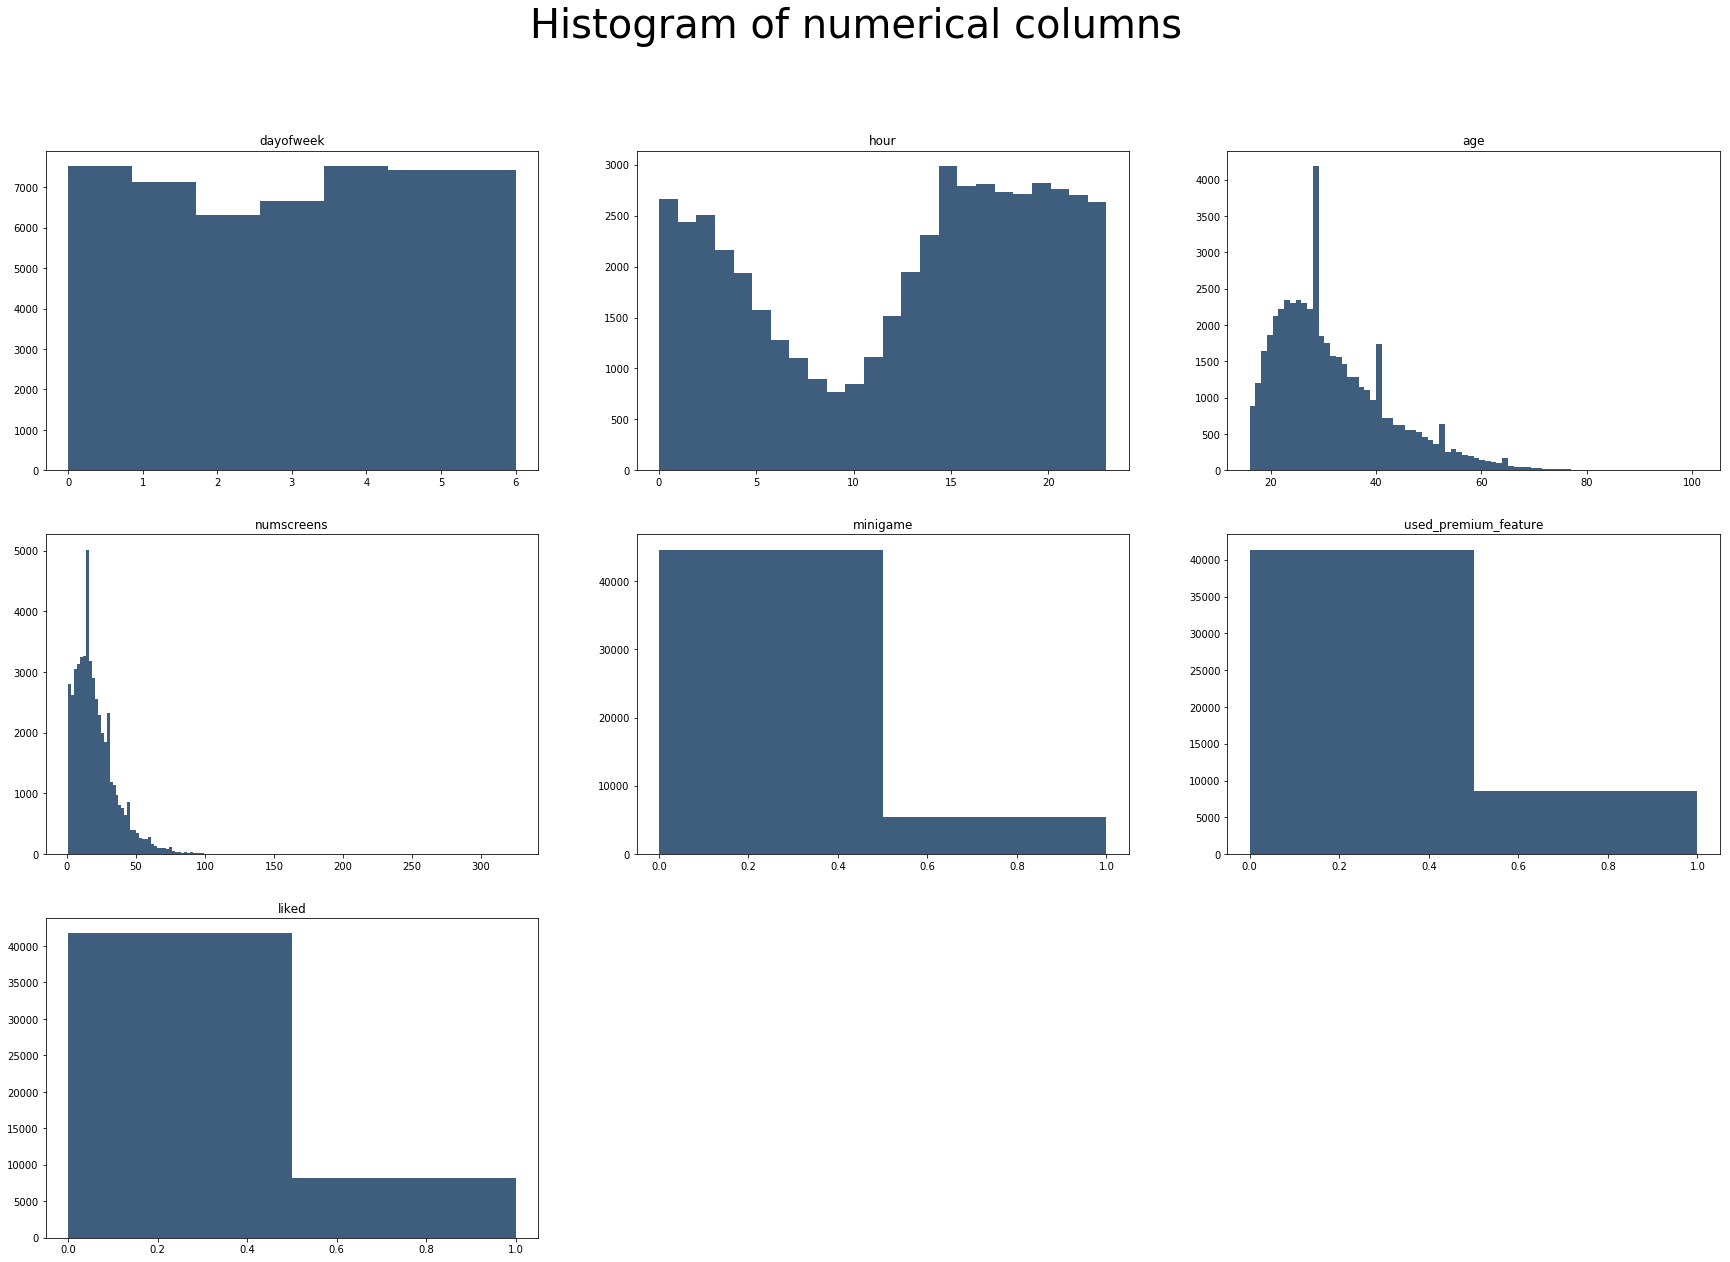

In [385]:
# Histogram

plt.figure(figsize=(30,20))
plt.suptitle('Histogram of numerical columns', fontsize = 40)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    vals = np.size(dataset2.iloc[:,i-1].unique())
    plt.hist(dataset2.iloc[:,i-1],bins = vals, color = "#3F5D7D")

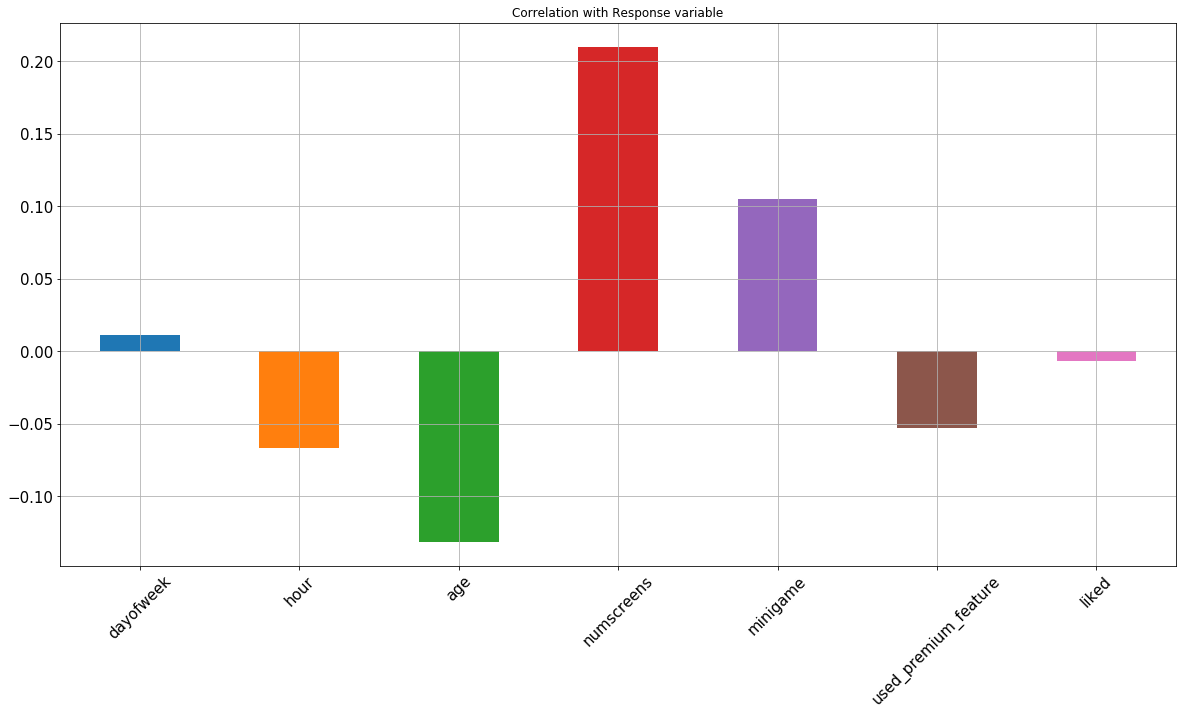

In [386]:
# Correlation with Response
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),
                                            title="Correlation with Response variable",
                                            fontsize=15,
                                            rot=45,
                                            grid=True)

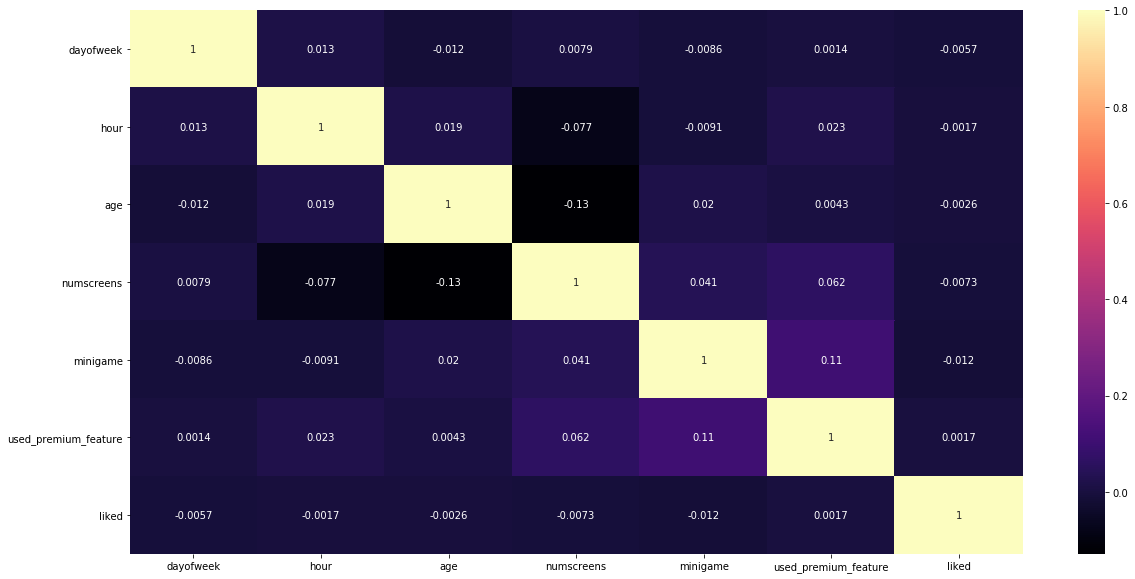

In [387]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset2.corr(),annot=True,cmap='magma')

In [388]:
dataset.enrolled_date.head()

0                        NaN
1                        NaN
2                        NaN
3    2013-07-05 16:11:49.513
4    2013-02-26 18:56:37.841
Name: enrolled_date, dtype: object

## Feature Engineering


In [389]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [390]:
# Formatting Date Columns
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]

In [391]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

## Selecting Time For Response


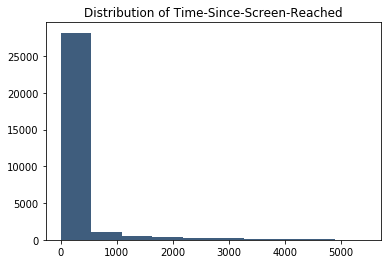

In [392]:
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')
response_hist = plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

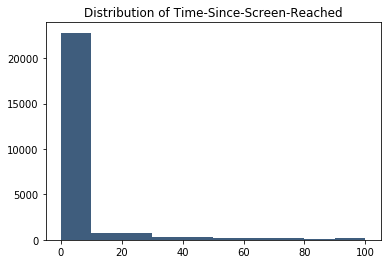

In [393]:
plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

In [394]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])

## ## Formatting the screen_list Field

In [395]:
# Load Top Screens
top_screens = pd.read_csv('dataset/top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [396]:
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

In [397]:
for i in range(3):
    print(dataset['screen_list'][i])

idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login,
joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2,
Splash,Cycle,Loan,


In [398]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")


In [399]:
dataset['screen_list'].head()

0    joinscreen,product_review,ScanPreview,VerifyTo...
1    joinscreen,product_review,product_review2,Scan...
2                                                     
3    product_review,Home,product_review,ReferralCon...
4    joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
Name: screen_list, dtype: object

In [400]:
dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=['screen_list'])

In [401]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
for i in range(30):
    for j in range(len(savings_screens)):
        print(dataset[savings_screens[j]][i],end=' ')
    print()

0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
1 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 


In [402]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)


In [403]:
dataset['SavingCount']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       2
28       0
29       0
        ..
49970    0
49971    0
49972    4
49973    0
49974    0
49975    0
49976    5
49977    0
49978    0
49979    0
49980    0
49981    0
49982    0
49983    0
49984    0
49985    0
49986    0
49987    0
49988    0
49989    0
49990    0
49991    0
49992    0
49993    0
49994    0
49995    0
49996    0
49997    0
49998    0
49999    7
Name: SavingCount, Length: 50000, dtype: int64

In [404]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

In [405]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)


In [406]:
dataset['LoansCount']

0        1
1        1
2        1
3        1
4        1
5        1
6        0
7        1
8        3
9        1
10       1
11       1
12       0
13       0
14       0
15       1
16       0
17       1
18       1
19       1
20       1
21       1
22       0
23       1
24       0
25       1
26       1
27       1
28       1
29       1
        ..
49970    0
49971    1
49972    2
49973    0
49974    1
49975    1
49976    1
49977    2
49978    0
49979    1
49980    0
49981    1
49982    0
49983    1
49984    1
49985    0
49986    1
49987    0
49988    2
49989    0
49990    0
49991    2
49992    1
49993    0
49994    1
49995    0
49996    0
49997    0
49998    0
49999    1
Name: LoansCount, Length: 50000, dtype: int64

In [407]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [408]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [409]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [441]:
dataset.to_csv('dataset/new_appdata10.csv', index = False)